#Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

#Weather data for two locations

In [5]:
np.random.seed(42)

dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='D')
n = len(dates)
locations = ['Location_A', 'Location_B']
weather_data_list = []
energy_data_list = []

for location in locations:
    weather_data_list.append(pd.DataFrame({
        'date': dates,
        'location': location,
        'temperature': np.random.normal(loc=20 if location == 'Location_A' else 25, scale=5, size=n),
        'wind_speed': np.random.normal(loc=5, scale=2, size=n),
        'solar_radiation': np.random.normal(loc=200, scale=50, size=n),
        'humidity': np.random.normal(loc=50, scale=10, size=n)
    }))

    energy_data_list.append(pd.DataFrame({
        'date': dates,
        'location': location,
        'energy_production': np.random.normal(loc=500 if location == 'Location_A' else 550, scale=100, size=n)
    }))

weather_data = pd.concat(weather_data_list, ignore_index=True)
energy_data = pd.concat(energy_data_list, ignore_index=True)

#Save and Load Dataset

In [6]:
# Save the synthetic data to CSV files
weather_data.to_csv('weather_data.csv', index=False)
energy_data.to_csv('historical_energy_production.csv', index=False)

# Load the datasets
energy_data = pd.read_csv('historical_energy_production.csv')
weather_data = pd.read_csv('weather_data.csv')

#Merge Datasets on common columns

In [7]:
# Merge datasets on common columns (e.g., date and location)
data = pd.merge(energy_data, weather_data, on=['date', 'location'])

# Handle missing values (if any)
data = data.dropna()

#Feature Engineering

In [8]:
# Feature engineering (e.g., extract month and year from date)
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Select relevant features
features = ['temperature', 'wind_speed', 'solar_radiation', 'humidity', 'month', 'year', 'location']
data = pd.get_dummies(data, columns=['location'], drop_first=False)  # One-hot encode the location
X = data.drop(['energy_production', 'date'], axis=1)
y = data['energy_production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10789.362968634261
R^2 Score: -0.05471654455715891


#Data Visualization

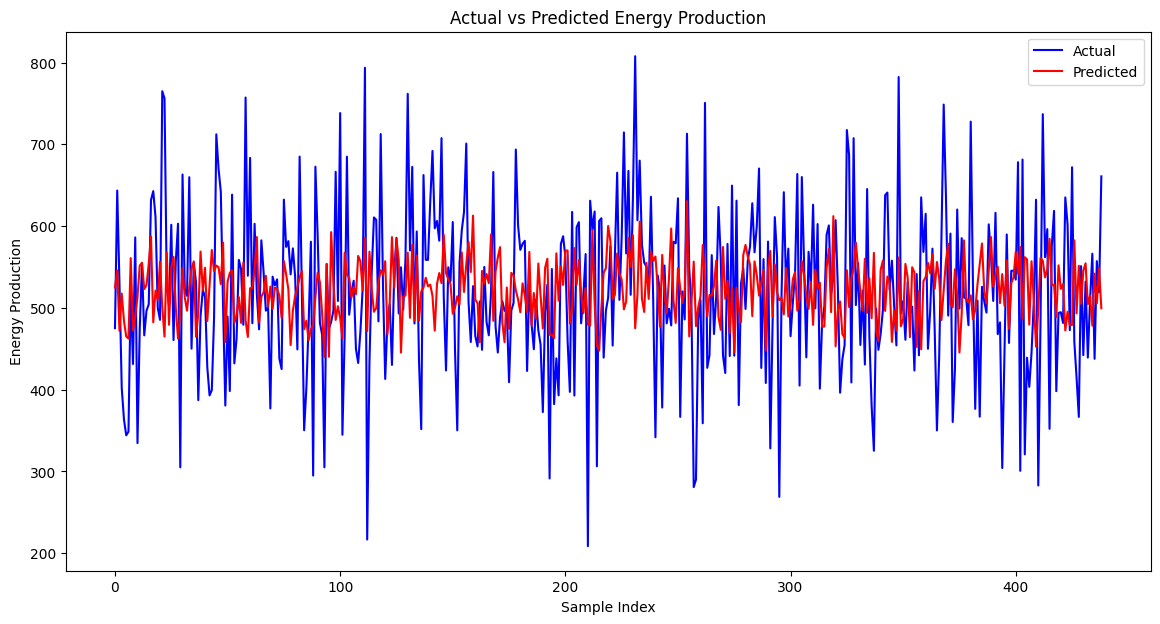

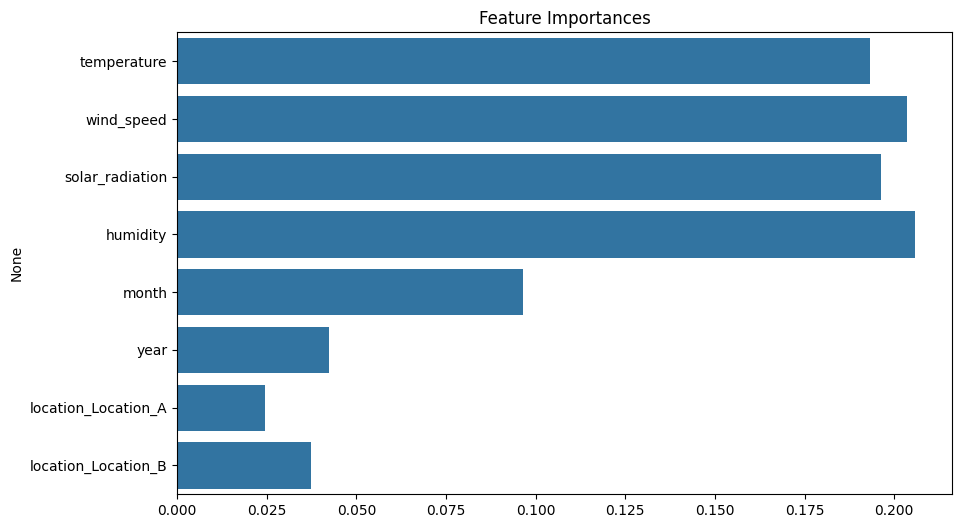

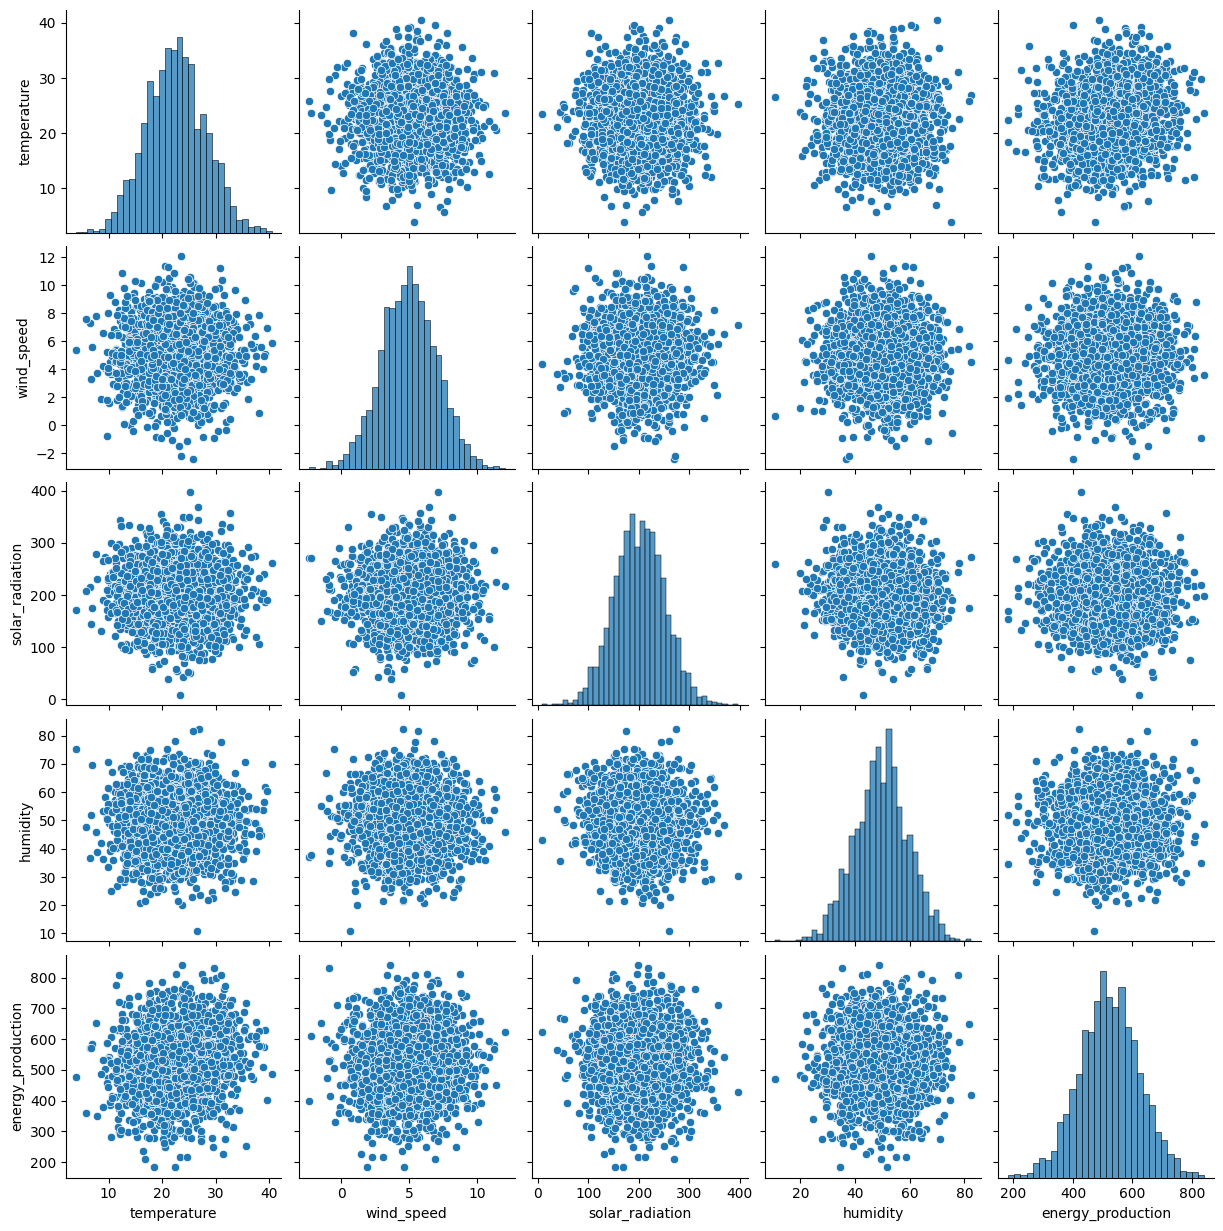

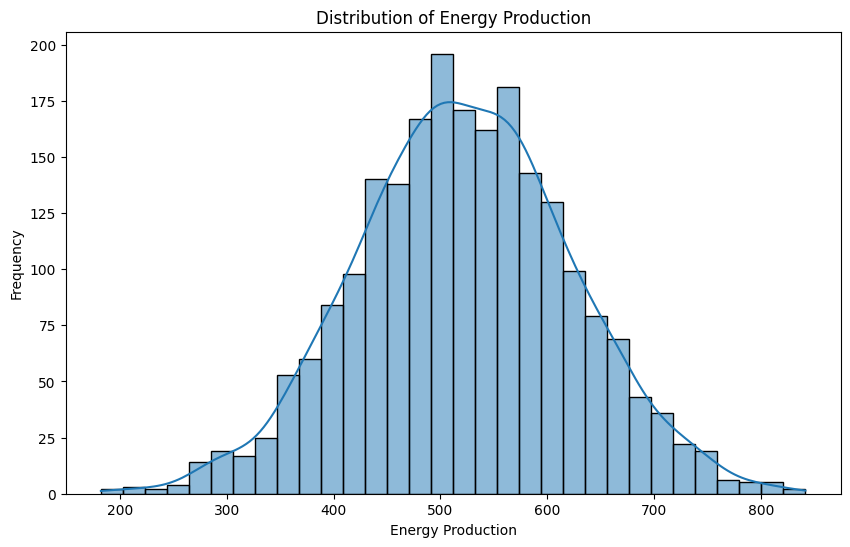

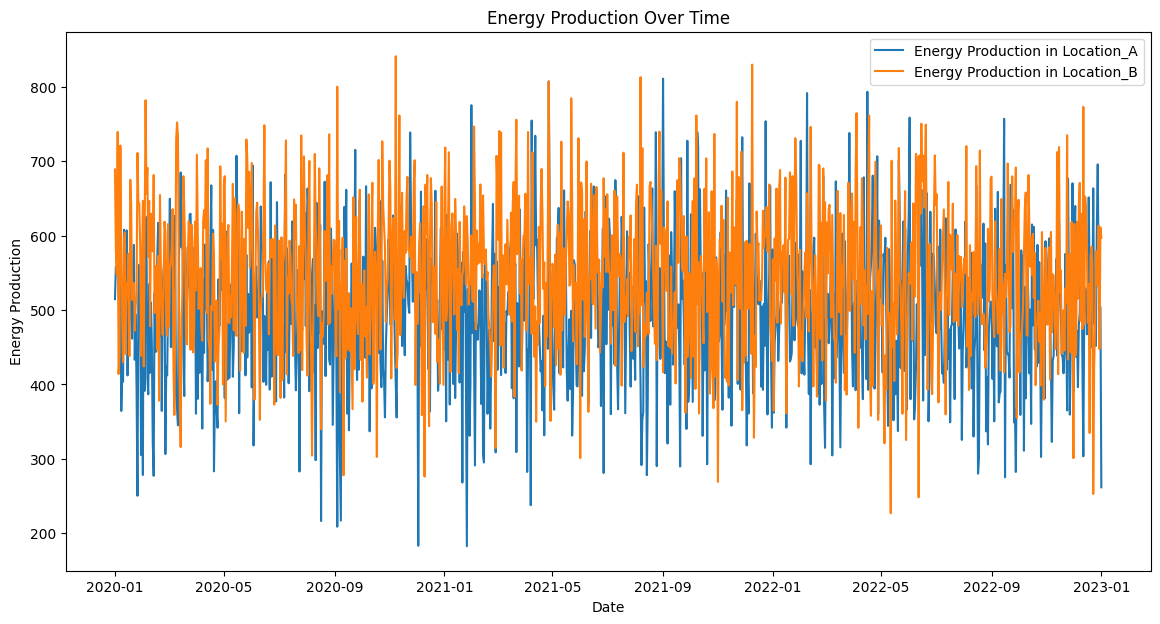

['renewable_energy_prediction_model.pkl']

In [10]:
# Visualize actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Energy Production')
plt.title('Actual vs Predicted Energy Production')
plt.legend()
plt.show()

# Feature importance visualization
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

# Pairplot to visualize relationships between features and target
sns.pairplot(data, vars=['temperature', 'wind_speed', 'solar_radiation', 'humidity', 'energy_production'])
plt.show()

# Distribution of energy production
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_production'], kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()

# Time series plot of energy production
plt.figure(figsize=(14, 7))
for location in locations:
    location_column = f'location_{location}'
    subset = data[data[location_column] == 1]
    plt.plot(subset['date'], subset['energy_production'], label=f'Energy Production in {location}')
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time')
plt.legend()
plt.show()

# Save the model
joblib.dump(model, 'renewable_energy_prediction_model.pkl')